## <font color = blue>Case Study on Regression

### Import the necessary libraries & Load the dataset into python environment :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\AATHIRA DSA\car_age_price.csv') 
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### Perform data understanding and exploration:

In [3]:
data.shape

(112, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


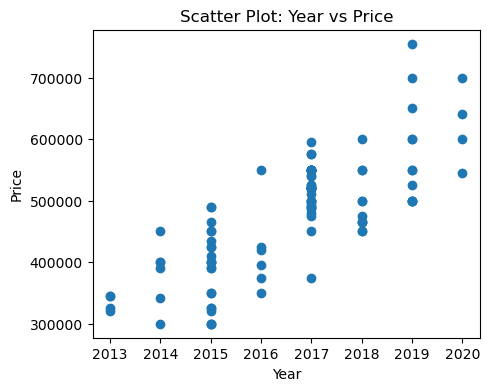

In [7]:
# Explore the relationship between Year and Price using a scatter plot:

plt.figure(figsize=(5, 4))  # Set the figure size
plt.scatter(data['Year'], data['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Scatter Plot: Year vs Price')
plt.show()

### Perform data cleaning and outlier detection:

In [8]:
# Check for missing values:

data.isna().sum()

Year     0
Price    0
dtype: int64

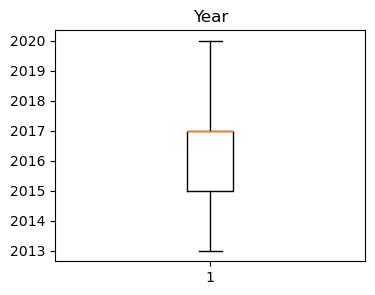

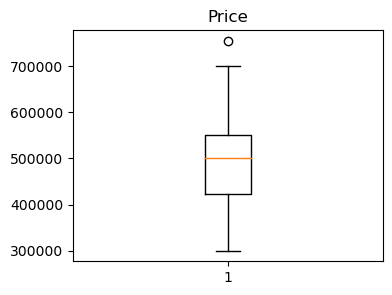

In [9]:
# Check for outliers:

num_cols = ['Year', 'Price']

for i in num_cols:
    plt.figure(figsize=(4,3))
    plt.boxplot(data[i])
    plt.title(i)

### Create a Heatmap to Visualize the Correlation:

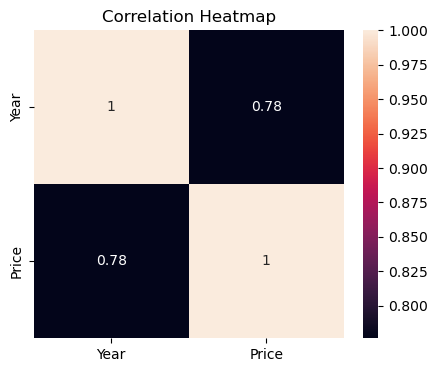

In [10]:
corrmatrix = data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corrmatrix,annot = True)
plt.title('Correlation Heatmap')
plt.show()

### Preprocess the Data and Perform Scaling: 

In [11]:
data.columns 

Index(['Year', 'Price'], dtype='object')

In [12]:
# Here,"Year" is the feature variable and the values represent consecutive years,
# The magnitude itself does not impact the relationship with the price,
# Therefore, we can directly use the "Year" feature as it is without scaling for regression in this scenario.

In [13]:
# Split the data into independent variable (year) and dependent variable (price):

y = data ['Price']   # target variable
X= data.drop(['Price'],axis = 1) # features

In [14]:
# Split the scaled data into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [15]:
# Display X_train, X_test:

print('X_train\n' , X_train.head())
print('X_test\n' , X_test.head())

X_train
      Year
73   2013
75   2017
6    2016
33   2017
106  2015
X_test
      Year
52   2013
63   2017
0    2018
107  2016
61   2017


In [16]:
# Display y_train, y_test:

print('y_train\n' , y_train.head())
print('y_test\n' , y_test.head())

y_train
 73     320000
75     490000
6      425000
33     550000
106    300000
Name: Price, dtype: int64
y_test
 52     345000
63     595000
0      465000
107    375000
61     540000
Name: Price, dtype: int64


### <font color = GREEN>Train and Evaluate the Linear Regression Model:

In [17]:
# Create and train the linear regression model:

lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)

In [18]:
# Make predictions on the test set:

y_predict_linear = linear_model.predict(X_test)

In [19]:
# Display y_predict:

print('y_predict_linear:\n', y_predict_linear)

y_predict_linear:
 [321689.11862396 497209.93665481 541090.14116251 453329.7321471
 497209.93665481 497209.93665481 584970.34567022 628850.55017793
 321689.11862396 497209.93665481 409449.52763939 584970.34567022
 497209.93665481 628850.55017793 584970.34567022 497209.93665481
 365569.32313167 584970.34567022 453329.7321471  584970.34567022
 541090.14116251 321689.11862396 497209.93665481]


### Calculate the Error  for Linear Regression:

In [20]:
# Calculate the mean squared error (MSE) and  R-squared error:

linear_mse = mean_squared_error(y_test,y_predict_linear)
linear_r2 = r2_score(y_test,y_predict_linear)

print(linear_mse)
print(linear_r2)

3130300571.490845
0.7179045607182537


### <font color = GREEN> Train and Evaluate the Lasso Regression Model:

In [21]:
# Create and train the Lasso regression model:

l = Lasso(alpha = 0.01)
lasso_model = l.fit(X_train, y_train)

In [22]:
# Make predictions on the test set:

y_predict_lasso = lasso_model.predict(X_test)

In [23]:
# Display y_predicted:

y_predict_lasso

array([321689.135516  , 497209.93475445, 541090.13456406, 453329.73494484,
       497209.93475445, 497209.93475445, 584970.33437365, 628850.53418326,
       321689.135516  , 497209.93475445, 409449.53513522, 584970.33437365,
       497209.93475445, 628850.53418326, 584970.33437365, 497209.93475445,
       365569.33532561, 584970.33437365, 453329.73494484, 584970.33437365,
       541090.13456406, 321689.135516  , 497209.93475445])

### Calculate the Error  for Lasso Regression Model:

In [24]:
# Calculate the mean squared error (MSE) and  R-squared error:

lasso_mse = mean_squared_error(y_test,y_predict_lasso)
lasso_r2 = r2_score(y_test,y_predict_lasso)

print(lasso_mse)
print(lasso_r2)

3130300523.9990044
0.7179045649981085


### <font color = GREEN> Compare the performance of both models & Evaluate the models:

In [25]:
# Print the mean squared error (MSE) & R-squared error for both models:

print("Linear Regression MSE:", linear_mse)
print("Linear Regression R2 Score:", linear_r2)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

Linear Regression MSE: 3130300571.490845
Linear Regression R2 Score: 0.7179045607182537
Lasso Regression MSE: 3130300523.9990044
Lasso Regression R2 Score: 0.7179045649981085


###### In terms of MSE, both Linear Regression and Lasso Regression models have similar values, indicating that they have similar prediction errors on the test set.When comparing the R2 score, which measures the proportion of the variance in the dependent variable explained by the independent variables, both models have similar scores.Overall,both Linear Regression and Lasso Regression models perform similarly in terms of prediction accuracy and explanatory power.

### Create Model:

In [26]:
if linear_mse < lasso_mse and linear_r2 > lasso_r2:
    selected_model = linear_model
    print("Selected model : Linear regression")
elif lasso_mse < linear_mse and lasso_r2 > linear_r2:
    selected_model = lasso_model
    print("Selected model : Lasso regression ")
else:
    print("Both models have similar performance.")

Selected model : Lasso regression 


### <font color = GREEN>Predict the price for the 2022 model:

In [27]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [28]:
predicted_price_2022 = selected_model.predict([[2022]])

In [29]:
print("Predicted price of a 2022 model second-hand Grand i10 is Rupees:", predicted_price_2022[0])

Predicted price of a 2022 model second-hand Grand i10 is Rupees: 716610.9338024855


### Visualization of predicted price for 2022 and the regression line:

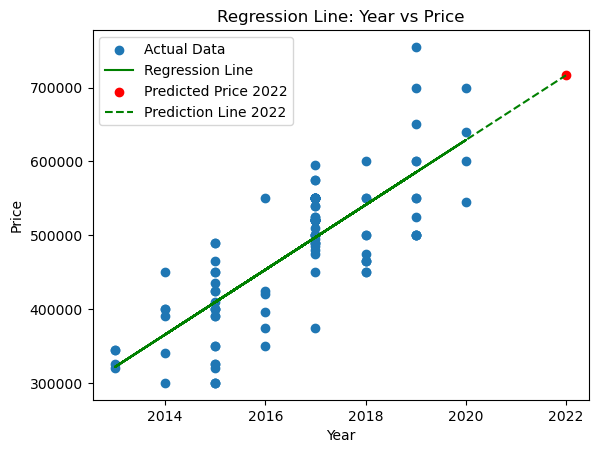

In [30]:
# Plot the scatter plot of "Year" vs "Price"
plt.scatter(X, y, label="Actual Data")

# Plot the regression line
plt.plot(X, selected_model.predict(X), color='green', label="Regression Line")

# Predict the price for the year 2022
year_2022 = [[2022]]
predicted_price_2022 = selected_model.predict(year_2022)

# Plot the predicted price for 2022 as a separate point
plt.scatter(year_2022, predicted_price_2022, color='red', label="Predicted Price 2022")

# Extend the regression line to the predicted price for 2022
X_min = X.min().values
X_2022 = year_2022[0]
y_min = selected_model.predict(X_min.reshape(-1, 1))
y_2022 = predicted_price_2022
plt.plot([X_min, X_2022], [y_min, y_2022], color='green', linestyle='--', label="Prediction Line 2022")

plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Regression Line: Year vs Price")
plt.legend()
plt.show()

#### <font color = magenta>Predicted price of a 2022 model second-hand Grand i10 is around Seven Lakh Sixteen Thousand Rupees only